In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.applications.densenet import decode_predictions

2024-07-04 12:23:13.912570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 12:23:13.912682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 12:23:14.056172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df = pd.read_csv('../input/movie-classifier/Multi_Label_dataset/train.csv')
img_list = []
df = df.head(2000)
for i in range(df.shape[0]):
    path = '../input/movie-classifier/Multi_Label_dataset/Images/'+df['Id'][i]+'.jpg'
    img = image.load_img(path,target_size=(475,300,3))
    img = image.img_to_array(img)
    img = img/255.0
    img_list.append(img)

img_list = np.array(img_list)

In [4]:
y = np.array(df.drop(['Id','Genre'],axis=1))


grouped = df.iloc[:, 2:27]
grouped = grouped.values.tolist()
dict = {df['Id'][0]: df['Genre']}
count = 0
for i in df['Id']:
    dict[i] =  grouped[count]
    count += 1

test_id = df['Id'][0]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(img_list, y, test_size = 0.1)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

print(x_train.shape)
model = DenseNet121(weights='imagenet', include_top=False, input_shape=(475, 300, 3))


x = model.output
x.shape
flat1 = tf.keras.layers.Flatten()(x)

for layer in model.layers:
    layer.trainable = False


x = model.output
#x = Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=x_train[0].shape)(x)
#x = (BatchNormalization())(x)
#x = (MaxPool2D(2,2))(x)
#x = (Dropout(0.3))(x)
#x = (Conv2D(32,kernel_size=(3,3),activation='relu'))(x)
#x = (BatchNormalization())(x)
#x = (MaxPool2D(2,2))(x)
#x = (Dropout(0.3))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = (BatchNormalization())(x)
x = (Dropout(0.6))(x)

#x = tf.keras.layers.Dense(64, activation='relu')(x)
#x = (BatchNormalization())(x)
#x = (Dropout(0.3))(x)
output = tf.keras.layers.Dense(25, activation='sigmoid')(x)

model = tf.keras.Model(inputs = model.inputs, outputs = output)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','top_k_categorical_accuracy'])

#model.summary()

history = model.fit(x_train, y_train, epochs = 25, batch_size = 64, validation_data =(x_test, y_test))
early_stopping = EarlyStopping(monitor = "val_loss", patience = 3, verbose = 1, restore_best_weights = True)
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Top 5 Test accuracy:', score[2])

(1800, 475, 300, 3)
Epoch 1/25
 1/29 ━━━━━━━━━━━━━━━━━━━━ 11:44 25s/step - accuracy: 0.0625 - loss: 1.1149 - top_k_categorical_accuracy: 0.2188

W0000 00:00:1720097905.822655      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.0789 - loss: 0.9124 - top_k_categorical_accuracy: 0.2557

W0000 00:00:1720097933.318065      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/29 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.0794 - loss: 0.9104 - top_k_categorical_accuracy: 0.2566 - val_accuracy: 0.2500 - val_loss: 2.2578 - val_top_k_categorical_accuracy: 0.3700
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.1781 - loss: 0.7440 - top_k_categorical_accuracy: 0.4273 - val_accuracy: 0.2250 - val_loss: 0.9475 - val_top_k_categorical_accuracy: 0.4150
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.2504 - loss: 0.6352 - top_k_categorical_accuracy: 0.5655 - val_accuracy: 0.2700 - val_loss: 0.7217 - val_top_k_categorical_accuracy: 0.5650
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - accuracy: 0.3053 - loss: 0.5069 - top_k_categorical_accuracy: 0.6448 - val_accuracy: 0.4050 - val_loss: 0.4474 - val_top_k_categorical_accuracy: 0.6800
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.4258 - loss: 0.3710 - top_k_categorical_accuracy: 0.7543 - val_accuracy: 0.4200 - val_loss: 0.3209 - val_top_k_categorical

In [8]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

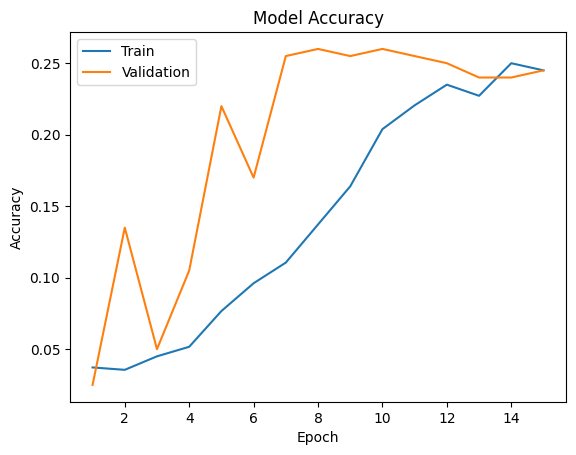

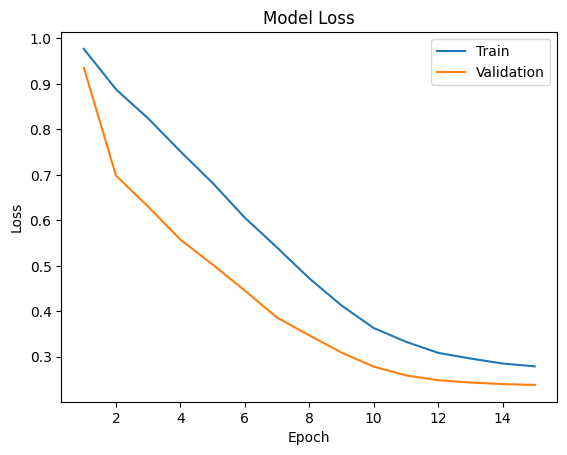

In [14]:
plotLearningCurve(history,15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Drama
Comedy
Horror


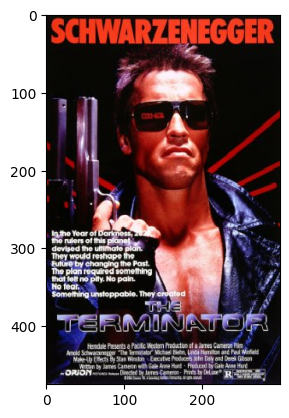

In [9]:
img = image.load_img('../input/movie-classifier/Multi_Label_dataset/Images/tt0088247.jpg',target_size=(475,300,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,475,300,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Drama
Comedy
Action


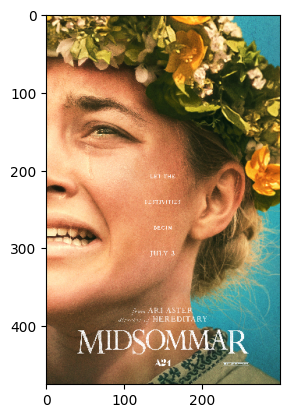

In [15]:
img = image.load_img('/kaggle/input/midsommar-jpg/midsommar.jpg',target_size=(475,300,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,475,300,3)
classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])

In [ ]:
# Depending on whether the people who developed the network normalized the data while training
# you might need to normalize as well

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


#x_train /= 255
#x_test /= 255
model2 = DenseNet121(weights='imagenet', input_shape = (475,300,3), include_top = False)


x_train_temp = (model2.predict(preprocess_input(x_train)))
x_test_temp = (model2.predict(preprocess_input(x_test)))

x_train_FE = tf.keras.layers.Flatten()(x_train_temp)
x_test_FE = tf.keras.layers.Flatten()(x_test_temp)

#print(x_test_FE.shape)
#print(x_train_FE.shape)

clf = LogisticRegression(random_state=0).fit(x_train_FE, y_train)
print(clf.score(x_test_FE, y_test))

conf = confusion_matrix(y_test, clf.predict(x_test_FE))

ConfusionMatrixDisplay(conf).plot()
plt.show()